In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
zip_path = "/content/drive/MyDrive/car damage severity.v1i.coco-segmentation.zip"  # Change to your actual file path
extract_path = "/content/car_damage_dataset_coco"  # Destination folder

# Create extract directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete! Files are in:", extract_path)


Mounted at /content/drive
Extraction complete! Files are in: /content/car_damage_dataset_coco


In [ ]:


# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

'2.6.0+cu124'

In [ ]:

# install dependencies
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-2ahud6lk
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-2ahud6lk
  Resolved https://github.com/facebookresearch/fvcore.git to commit a491d5b9a06746f387aca2f1f9c7c7f28e20bef9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-az5qwyws
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-az5qwyws
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done


'2.6.0+cu124'

In [ ]:


!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [ ]:
from detectron2.data import DatasetCatalog, MetadataCatalog
from collections import Counter
import matplotlib.pyplot as plt
import json
import os

# Load dataset entries
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata = MetadataCatalog.get("car_dataset_train")

print(f"Total images: {len(dataset_dicts)}")
print(f"Metadata categories: {metadata.thing_classes}")


AssertionError: Attribute 'thing_classes' in the metadata of 'car_dataset_train' cannot be set to a different value!
['moderate-minor-severe', 'minor', 'moderate', 'severe'] != ['minor', 'moderate', 'severe']

In [ ]:
import json

def count_classes(file_path):
    try:
        # Load the JSON file
        with open(file_path, "r") as f:
            data = json.load(f)

        # Extract class names
        if "categories" not in data:
            print("Error: No 'categories' found in the JSON file!")
            return

        categories = data["categories"]
        class_count = len(categories)
        class_names = [cat["name"] for cat in categories]

        print(f"Total classes: {class_count}")
        print("Class names:", class_names)

    except json.JSONDecodeError:
        print("Error: Invalid JSON file format!")
    except Exception as e:
        print(f"Error: {e}")

# Run the function
file_path = "/content/car_damage_dataset_coco/train/_annotations.coco.json"
count_classes(file_path)


Total classes: 4
Class names: ['moderate-minor-severe', 'minor', 'moderate', 'severe']


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
import os
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

# 1. Dataset Registration (already done by you)
dataset_dir = "/content/car_damage_dataset_coco"
train_dir = "train"
val_dir = "valid"

dataset_name_train = "car_dataset_train"
dataset_name_val = "car_dataset_val"

# Unregister if exists (your existing code)
if dataset_name_train in DatasetCatalog:
    DatasetCatalog.remove(dataset_name_train)
    MetadataCatalog.remove(dataset_name_train)
if dataset_name_val in DatasetCatalog:
    DatasetCatalog.remove(dataset_name_val)
    MetadataCatalog.remove(dataset_name_val)

# Register datasets (your existing code)
register_coco_instances(
    dataset_name_train, {},
    os.path.join(dataset_dir, train_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, train_dir)
)
register_coco_instances(
    dataset_name_val, {},
    os.path.join(dataset_dir, val_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, val_dir)
)


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
import os

class CustomTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

def setup_datasets():
    # Dataset Directory
    dataset_dir = "/content/car_damage_dataset_coco"
    train_dir = "train"
    val_dir = "valid"

    dataset_name_train = "car_dataset_train"
    dataset_name_val = "car_dataset_val"

    # Unregister if exists
    for name in [dataset_name_train, dataset_name_val]:
        if name in DatasetCatalog:
            DatasetCatalog.remove(name)
            MetadataCatalog.remove(name)

    # Register datasets
    register_coco_instances(
        dataset_name_train, {},
        os.path.join(dataset_dir, train_dir, "_annotations.coco.json"),
        os.path.join(dataset_dir, train_dir)
    )
    register_coco_instances(
        dataset_name_val, {},
        os.path.join(dataset_dir, val_dir, "_annotations.coco.json"),
        os.path.join(dataset_dir, val_dir)
    )

    return dataset_name_train, dataset_name_val

def setup_config(train_dataset, val_dataset):
    cfg = get_cfg()
    cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))

    # Dataset configuration
    cfg.DATASETS.TRAIN = (train_dataset,)
    cfg.DATASETS.TEST = (val_dataset,)

    # Training parameters
    cfg.DATALOADER.NUM_WORKERS = 2
    cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    cfg.SOLVER.IMS_PER_BATCH = 2
    cfg.SOLVER.BASE_LR = 0.0001
    cfg.SOLVER.MAX_ITER = 3000  # Increased from 300 for better convergence
    cfg.SOLVER.STEPS = [2000, 2500]
    cfg.SOLVER.CHECKPOINT_PERIOD = 500  # Save checkpoint every 500 iterations

    # Model configuration
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
    cfg.MODEL.ROI_HEADS.NUM_CLASSES =4   # Your number of classes

    # Evaluation configuration
    cfg.TEST.EVAL_PERIOD = 500  # Evaluate every 500 iterations
    cfg.OUTPUT_DIR = "./output"  # Output directory

    return cfg

def main():
    # Setup datasets
    train_dataset, val_dataset = setup_datasets()

    # Setup config
    cfg = setup_config(train_dataset, val_dataset)

    # Create output directory
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

    # Train
    trainer = CustomTrainer(cfg)
    trainer.resume_or_load(resume=False)
    trainer.train()

if __name__ == "__main__":
    main()

In [ ]:
cfg.OUTPUT_DIR1 = "/content/output/model_final.pth"


NameError: name 'cfg' is not defined

In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Source and destination paths
source_path = "/content/output/model_final.pth"

destination_path = "/content/drive/My Drive/severity 3000 itr final/model_final.pth"

# Copy the model file to Google Drive
shutil.copy(source_path, destination_path)

print(f"Model saved to {destination_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/My Drive/severity 3000 itr final/model_final.pth


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
import os
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

# Dataset Directory
dataset_dir = "/content/car_damage_dataset_coco"
train_dir = "train"
val_dir = "valid"

dataset_name_train = "car_dataset_train"
dataset_name_val = "car_dataset_val"

# Unregister if exists
if dataset_name_train in DatasetCatalog:
    DatasetCatalog.remove(dataset_name_train)
    MetadataCatalog.remove(dataset_name_train)
if dataset_name_val in DatasetCatalog:
    DatasetCatalog.remove(dataset_name_val)
    MetadataCatalog.remove(dataset_name_val)

# Register datasets
register_coco_instances(
    dataset_name_train, {},
    os.path.join(dataset_dir, train_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, train_dir)
)
register_coco_instances(
    dataset_name_val, {},
    os.path.join(dataset_dir, val_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, val_dir)
)

# Load Detectron2 Config
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

# Training
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


In [ ]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.evaluation import COCOEvaluator
import os

# Paths
dataset_dir = "/content/car_damage_dataset_coco"
train_dir = "train"
val_dir = "valid"

# Dataset names
dataset_name_train = "car_dataset_train"
dataset_name_val = "car_dataset_val"

# Re-register dataset
for name in [dataset_name_train, dataset_name_val]:
    if name in DatasetCatalog:
        DatasetCatalog.remove(name)
        MetadataCatalog.remove(name)

register_coco_instances(
    dataset_name_train, {},
    os.path.join(dataset_dir, train_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, train_dir)
)
register_coco_instances(
    dataset_name_val, {},
    os.path.join(dataset_dir, val_dir, "_annotations.coco.json"),
    os.path.join(dataset_dir, val_dir)
)

# ⚙️ Custom Trainer with Evaluator
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "eval")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

# Config setup
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

cfg.DATASETS.TRAIN = (dataset_name_train,)
cfg.DATASETS.TEST = (dataset_name_val,)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2

# 🔧 TRAINING LENGTH
cfg.SOLVER.MAX_ITER = 3000  # way more than 300
cfg.SOLVER.STEPS = [2000, 2600]  # LR decays
cfg.SOLVER.GAMMA = 0.1

# 🔧 OPTIMIZATION
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.CHECKPOINT_PERIOD = 500
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # ✅ corrected from 4 -> 3

# 🔧 OUTPUT
cfg.OUTPUT_DIR = "./output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Train
trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[04/05 13:22:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[04/05 13:22:04 d2.engine.train_loop]: Starting training from iteration 0
[04/05 13:22:11 d2.utils.events]:  eta: 0:17:54  iter: 19  total_loss: 2.386  loss_cls: 1.231  loss_box_reg: 0.4063  loss_mask: 0.6922  loss_rpn_cls: 0.02431  loss_rpn_loc: 0.009173    time: 0.3503  last_time: 0.2842  data_time: 0.0182  last_data_time: 0.0050   lr: 4.9953e-06  max_mem: 2959M
[04/05 13:22:18 d2.utils.events]:  eta: 0:16:41  iter: 39  total_loss: 2.338  loss_cls: 1.138  loss_box_reg: 0.443  loss_mask: 0.6897  loss_rpn_cls: 0.01445  loss_rpn_loc: 0.01096    time: 0.3403  last_time: 0.3813  data_time: 0.0076  last_data_time: 0.0119   lr: 9.9902e-06  max_mem: 2959M
[04/05 13:22:25 d2.utils.events]:  eta: 0:16:36  iter: 59  total_loss: 2.079  loss_cls: 0.9784  loss_box_reg: 0.3814  loss_mask: 0.6821  loss_rpn_cls: 0.01642  loss_rpn_loc: 0.008178    time: 0.3416  last_time: 0.3322  data_time: 0.0098  last_data_time: 0.0064   lr: 1.4985e-05  max_mem: 2959M
[04/05 13:22:32 d2.utils.events]:  eta: 0:16:39 

In [ ]:
cfg.OUTPUT_DIR = "/content/drive/MyDrive/car_damage_model_output"
cfg.OUTPUT_DIR = "/content/drive/MyDrive/car_damage_model_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/car_damage_model_output/model_final.pth"



In [ ]:
!cp /content/output/model_final.pth /content/drive/MyDrive/models/model_final.pth


In [ ]:
!mkdir -p /content/drive/MyDrive/models


[04/05 13:57:58 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/model_final.pth ...
WARNING [04/05 13:57:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[04/05 13:57:59 d2.data.datasets.coco]: Loaded 35 images in COCO format from /content/car_damage_dataset_coco/valid/_annotations.coco.json


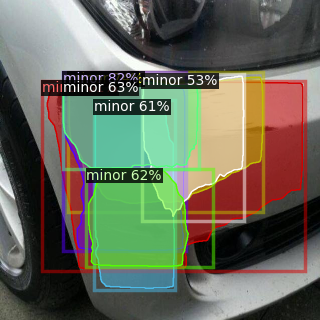

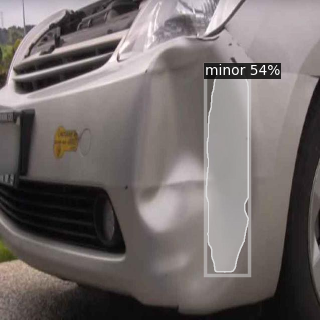

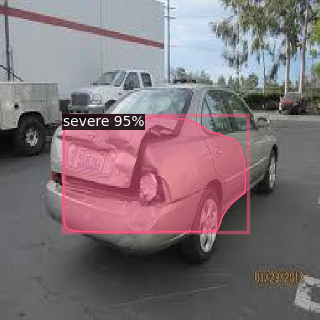

In [ ]:
import random
import cv2
import torch
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load the trained model configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # Ensure this matches the number of classes
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/model_final.pth"  # Path to your trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a confidence threshold
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available

# Initialize predictor
predictor = DefaultPredictor(cfg)

# Load dataset information
dataset_dicts = DatasetCatalog.get("car_dataset_val")
metadata = MetadataCatalog.get("car_dataset_val")

# Run predictions on a few sample images
for d in random.sample(dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # Get predictions

    # Visualize the results
    v = Visualizer(im[:, :, ::-1],  # Convert BGR to RGB
                   metadata=metadata,
                   scale=0.5
                   )  # Grayscale unsegmented areas

    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])  # Display image in Colab


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 22  # Change based on your dataset
cfg.MODEL.WEIGHTS = "/content/output/model_final.pth"  # Path to trained model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Confidence threshold
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get("car_dataset_val")  # Use your dataset metadata


[04/05 13:09:19 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/output/model_final.pth ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


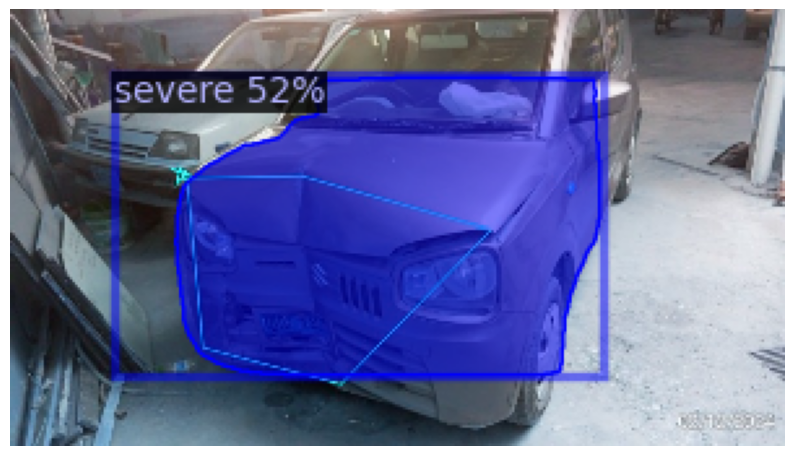

In [ ]:
import glob

# Path to test images
test_images = glob.glob("/content/IMG_20241202_121720 (1).jpg")

for img_path in test_images:
    im = cv2.imread(img_path)

    # Run prediction
    outputs = predictor(im)

    # Visualize
    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5
                   )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Show the result
    plt.figure(figsize=(10, 10))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.axis("off")
    plt.show()


In [ ]:
import os
file_path = '/content/drive/MyDrive/model_final.pth'
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")


File exists


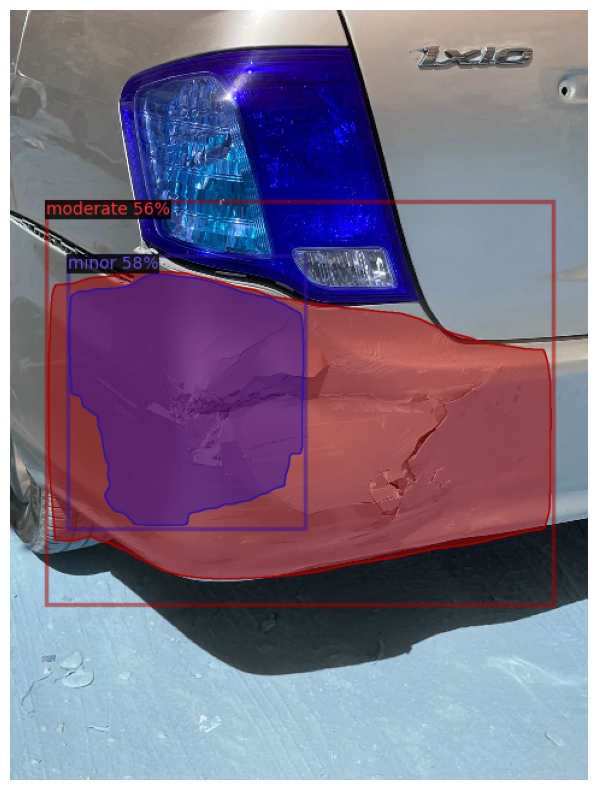

In [ ]:
import glob

# Path to test images
test_images = glob.glob("/content/WhatsApp Image 2025-03-21 at 14.39.22_e1eafb55.jpg")

for img_path in test_images:
    im = cv2.imread(img_path)

    # Run prediction
    outputs = predictor(im)

    # Visualize
    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5
                   )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Show the result
    plt.figure(figsize=(10, 10))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.axis("off")
    plt.show()


In [ ]:
!pip install gradio


In [ ]:
import gradio as gr
import cv2
import numpy as np
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from PIL import Image

# Define prediction function
def predict_damage(image):
    # Convert PIL Image to NumPy array
    image_np = np.array(image)

    # Ensure it's in the correct format (H, W, C)
    if image_np.shape[-1] == 4:  # Remove alpha channel if present
        image_np = image_np[:, :, :3]

    # Run model prediction
    outputs = predictor(image_np)

    # Visualize results
    v = Visualizer(image_np[:, :, ::-1], MetadataCatalog.get("car_dataset_val"), scale=0.8)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    # Convert back to PIL Image
    result_image = Image.fromarray(out.get_image()[:, :, ::-1])

    return result_image

# Launch Gradio UI
gr.Interface(fn=predict_damage, inputs="image", outputs="image", title="Car Damage Detection").launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://eb67afdbf42ae4d6fc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://eb67afdbf42ae4d6fc.gradio.live
